In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
### read in shapefiles ###
# sonoma county
soco_bound = gpd.read_file("../data/clean/sonoma_county_boundary/sonoma_county_boundary.shp")
# MTC data
mtc = gpd.read_file("../data/raw/mtc_data/equity_priority_communities_2020_acs2018.shp")
# California Climate Investments Priority Populations 3.0 by Census Tract
prioity_pop = gpd.read_file("../data/raw/priority_pops_ces3_2021/priority_pops.shp") 
#CalEnviroScreen 4.0
calenviro = gpd.read_file("../data/raw/calenviroscreen_4.0_2021/CES4 Final Shapefile.shp") 

### Metropolitan Transportation Commisssion (MTC) Plan Bay Area 2050 Equity Priority Communities

In [8]:
mtc.head()

,objectid,geoid,state_fip,county_fip,tract,tot_pop,tot_pop_po,tot_pop_ci,tot_hh,tot_fam,...,hus_re_1_2,zvhh_1_2,epc_2035,epc_2040,epc_2050,c2040_2050,epc_class,SHAPE_Leng,SHAPE_Area,geometry
0,1,06001400100,06,001,400100,3115,3105,3115,1297,917,...,0,0,0,0,0,0,NA,0.132962,0.000708,"POLYGON ((-122.24692 37.88544, -122.24197 37.8..."
1,2,06001400200,06,001,400200,2025,2018,2025,855,468,...,0,0,0,0,0,0,NA,0.041276,0.000059,"POLYGON ((-122.25742 37.84310, -122.25620 37.8..."
2,3,06001400300,06,001,400300,5000,4962,5000,2441,1156,...,0,1,0,0,0,0,NA,0.055914,0.000113,"POLYGON ((-122.26416 37.84000, -122.26186 37.8..."
3,4,06001400700,06,001,400700,5116,5106,5116,1947,910,...,0,0,1,1,0,-1,NA,0.042183,0.000090,"POLYGON ((-122.27788 37.84751, -122.27777 37.8..."
4,5,06001400800,06,001,400800,3792,3792,3792,1626,697,...,1,0,0,0,0,0,NA,0.037540,0.000071,"POLYGON ((-122.28873 37.84996, -122.28625 37.8..."


In [10]:
list(mtc.columns)

['objectid',
 'geoid',
 'state_fip',
 'county_fip',
 'tract',
 'tot_pop',
 'tot_pop_po',
 'tot_pop_ci',
 'tot_hh',
 'tot_fam',
 'tot_pop_ov',
 'pop_over75',
 'pop_poc',
 'pop_spfam',
 'pop_lep',
 'pop_below2',
 'pop_disabi',
 'pop_hus_re',
 'pop_zvhhs',
 'pct_over75',
 'pct_poc',
 'pct_spfam',
 'pct_lep',
 'pct_below2',
 'pct_disab',
 'pct_hus_re',
 'pct_zvhhs',
 'over75_1_2',
 'poc_1_2',
 'spfam_1_2',
 'lep_1_2',
 'below2_1_2',
 'disab_1_2',
 'hus_re_1_2',
 'zvhh_1_2',
 'epc_2035',
 'epc_2040',
 'epc_2050',
 'c2040_2050',
 'epc_class',
 'SHAPE_Leng',
 'SHAPE_Area',
 'geometry']

##### Now add up the number of times each census tract was over the MTC threshold (Regional mean + 0.5 standard deviation) for each community indciator 

In [17]:
# filter to just sonoma county 097 is the Sonoma County fip code
mtc_threshold = mtc[(mtc["county_fip"] == "097")]

# check it worked: 
mtc_threshold.plot(column="pct_poc", figsize = (12,10), legend=True)

In [18]:
# melt to a tidy format
mtc_threshold = pd.melt(mtc_threshold, id_vars=['tract', "geometry"], value_vars=['over75_1_2', 'poc_1_2', 'spfam_1_2', 'lep_1_2', 
                                                                      'below2_1_2', 'disab_1_2','hus_re_1_2', 'zvhh_1_2'],
                        var_name='indicators', value_name='passed_threshold')
mtc_threshold.head()

,tract,geometry,indicators,passed_threshold
0,153804,"POLYGON ((-122.81661 38.56178, -122.81426 38.5...",over75_1_2,0
1,150203,"POLYGON ((-122.47689 38.29388, -122.47584 38.2...",over75_1_2,1
2,150204,"POLYGON ((-122.46805 38.29292, -122.45899 38.2...",over75_1_2,1
3,150303,"POLYGON ((-122.57457 38.32486, -122.57353 38.3...",over75_1_2,1
4,150304,"POLYGON ((-122.50205 38.32044, -122.49453 38.3...",over75_1_2,0


In [21]:
# calculate the sum for each census tract
mtc_thresh_sum = mtc_threshold.dissolve(by='tract', aggfunc='sum')
mtc_thresh_sum.head()

,geometry,passed_threshold
tract,,
150100,"MULTIPOLYGON (((-122.45208 38.11910, -122.4514...",2
150202,"POLYGON ((-122.47773 38.30579, -122.47679 38.3...",1
150203,"POLYGON ((-122.46916 38.28577, -122.46009 38.2...",2
150204,"POLYGON ((-122.44553 38.29073, -122.44211 38.2...",2
150303,"POLYGON ((-122.56856 38.32756, -122.56850 38.3...",2


<AxesSubplot:>

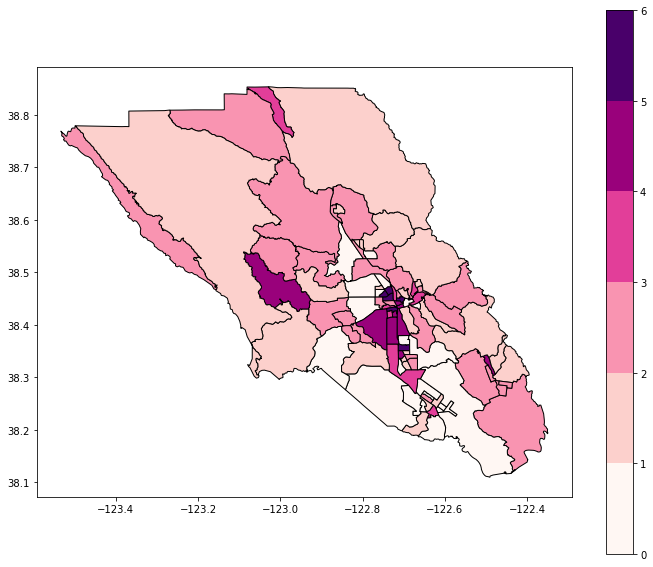

In [32]:
# plot the data
mtc_thresh_sum.plot(column="passed_threshold", cmap=plt.cm.get_cmap('RdPu', 6), edgecolor="black", figsize = (12,10), legend=True)

### California Climate Investments Priority Populations 3.0 by Census Tract -- <font color='red'>Decided not to use</font>

In [11]:
prioity_pop.head()

,Tract,DAC,BufferYN,LowIncome,display,LIH_halfmi,geometry
0,6.037403e+09,No,No,No,5,Yes,"POLYGON ((-13113618.926 4034561.335, -13113627..."
1,6.037403e+09,No,No,No,5,Yes,"POLYGON ((-13116199.201 4033720.779, -13116206..."
2,6.037403e+09,No,No,No,5,Yes,"POLYGON ((-13115312.557 4033292.473, -13115314..."
3,6.037403e+09,No,No,No,5,Yes,"POLYGON ((-13114094.715 4033700.220, -13114089..."
4,6.037403e+09,No,No,No,0,No,"POLYGON ((-13114094.715 4033700.220, -13114284..."


In [19]:
#add new column with names of designations
 # Create conditions for groupin water years
conditions = [
    (prioity_pop["display"] == 1),
    (prioity_pop["display"] == 2),
    (prioity_pop["display"] == 3),
    (prioity_pop["display"] == 4),
    (prioity_pop["display"] == 5) 
    ]

 # create a list of the values we want to assign for each condition
values = ["Disadvantaged Community", 'Disadvantaged and Low-income Community', 
            'Low-income Community', 'Low-income Community within 1/2 mile of Disadvantaged Community', 
            "Potential Low-income Households within 1/2 mile of Disadvantaged Community"]

# create a new column and use np.select to assign values to it using our lists as arguments
prioity_pop["category"] = np.select(conditions, values)

# take out shapefiles of communities that are not underserved
prioity_pop = prioity_pop[prioity_pop.display != 0]

prioity_pop.sample(10)

,Tract,DAC,BufferYN,LowIncome,display,LIH_halfmi,geometry,category
1341,6.059089e+09,No,No,Yes,3,No,"POLYGON ((-13132073.169 3998307.572, -13132078...",Low-income Community
3056,6.037540e+09,Yes,No,Yes,2,No,"POLYGON ((-13156470.813 4018521.531, -13156519...",Disadvantaged and Low-income Community
1109,6.059110e+09,No,No,No,5,Yes,"POLYGON ((-13138876.096 4009860.028, -13138884...",Potential Low-income Households within 1/2 mil...
338,6.037268e+09,No,No,No,5,Yes,"POLYGON ((-13186634.505 4033789.016, -13186748...",Potential Low-income Households within 1/2 mil...
1009,6.037117e+09,No,No,No,5,Yes,"POLYGON ((-13187490.469 4061415.737, -13187471...",Potential Low-income Households within 1/2 mil...
2634,6.067005e+09,No,No,Yes,3,No,"POLYGON ((-13520365.102 4648708.371, -13520337...",Low-income Community
2114,6.113011e+09,No,No,Yes,3,No,"POLYGON ((-13555879.476 4677638.207, -13555882...",Low-income Community
3616,6.035040e+09,No,No,Yes,3,No,"POLYGON ((-13445434.532 5039524.998, -13445393...",Low-income Community
1605,6.047001e+09,Yes,No,Yes,2,No,"POLYGON ((-13412611.251 4482878.408, -13412588...",Disadvantaged and Low-income Community
5264,6.007002e+09,No,Yes,Yes,4,No,"POLYGON ((-13532292.340 4795754.196, -13532370...",Low-income Community within 1/2 mile of Disadv...


In [25]:
# crop to sonoma county
soco_crs = soco_bound.to_crs(epsg=3857)
soco_priority_pop = gpd.overlay(prioity_pop, soco_crs, how='intersection')

<AxesSubplot:>

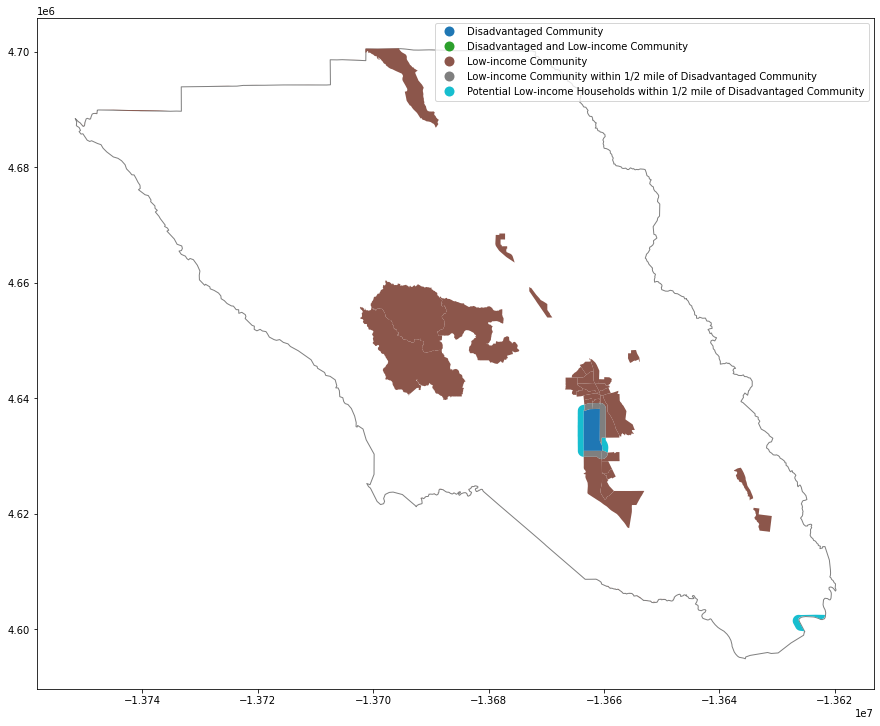

In [29]:
# plot
fig, ax = plt.subplots(figsize=(15,15))
soco_crs.plot(ax=ax, edgecolor = "grey", color = "white")
soco_priority_pop.plot(ax=ax,column="category", figsize = (12,10), legend=True)

In [ ]:
# export
soco_priority_pop.to_file("../data/clean/soco_priority_pops_ces3_2021/soco_priority_pop.shp")

### CalEnviroScreen 4.0 -- <font color='red'>Decided not to use</font>

In [3]:
calenviro.head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [6]:
calenviro.columns

Index(['Tract', 'ZIP', 'County', 'ApproxLoc', 'TotPop19', 'CIscore',
       'CIscoreP', 'Ozone', 'OzoneP', 'PM2_5', 'PM2_5_P', 'DieselPM',
       'DieselPM_P', 'Pesticide', 'PesticideP', 'Tox_Rel', 'Tox_Rel_P',
       'Traffic', 'TrafficP', 'DrinkWat', 'DrinkWatP', 'Lead', 'Lead_P',
       'Cleanup', 'CleanupP', 'GWThreat', 'GWThreatP', 'HazWaste', 'HazWasteP',
       'ImpWatBod', 'ImpWatBodP', 'SolWaste', 'SolWasteP', 'PollBurd',
       'PolBurdSc', 'PolBurdP', 'Asthma', 'AsthmaP', 'LowBirtWt', 'LowBirWP',
       'Cardiovas', 'CardiovasP', 'Educatn', 'EducatP', 'Ling_Isol',
       'Ling_IsolP', 'Poverty', 'PovertyP', 'Unempl', 'UnemplP', 'HousBurd',
       'HousBurdP', 'PopChar', 'PopCharSc', 'PopCharP', 'Child_10',
       'Pop_10_64', 'Elderly65', 'Hispanic', 'White', 'AfricanAm', 'NativeAm',
       'OtherMult', 'Shape_Leng', 'Shape_Area', 'AAPI', 'geometry'],
      dtype='object')

In [5]:
# crop to sonoma county
calenviro_crs = calenviro.to_crs(epsg=4269)
soco_calenviro = gpd.overlay(calenviro_crs, soco_bound, how='intersection')

<AxesSubplot:>

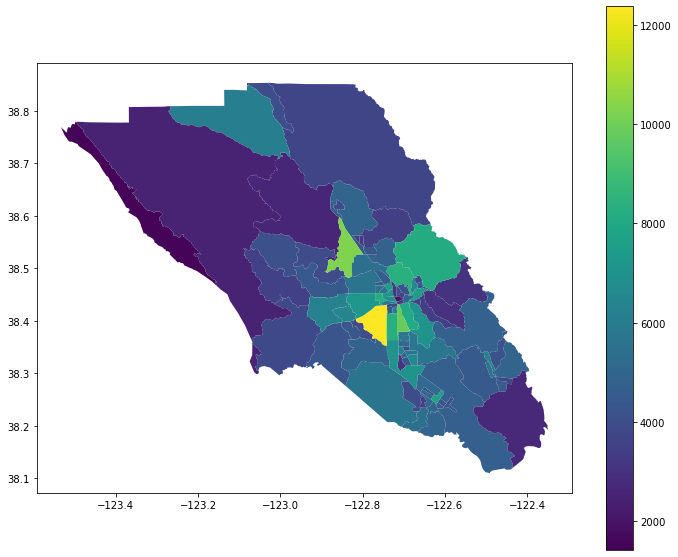

In [9]:
soco_calenviro.plot(column="TotPop19", figsize = (12,10), legend=True)

In [10]:
# export
soco_calenviro.to_file("../data/clean/soco_calenviroscreen_4.0/soco_calenviro.shp")